<a href="https://colab.research.google.com/github/Kevin610-cpu/FDSFE_KCarter/blob/main/Kevin_Carter_Multiple_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Linear Regression**

---

###Data

The data used in this assignment contains a cleaned and curated version of the market real estate valuations collected from Sindian Dist., New Taipei City, Taiwan, by Prof. I-Cheng Yeh, Department of Civil Engineering, Tamkang University, Taiwan.

The features in the data are the following:

* ```transaction_date```: the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* ```house_age```: the house age (unit: year)
* ```distance_nearest_MRT_station```: the distance to the nearest MRT station (unit: meter)
* ```convenience_stores```: the number of convenience stores in the living circle on foot (integer)

The target is:
* ```house_price_unit_area```house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

---

## HW instructions:

Similar to what was done in class, your task is to do the following:
1.   create a simple regression model that utilizes only one feature: the log10 of ```distance_nearest_MRT_station``` to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient (slope) of the line.

2.   create a multiple regression model that utilizes all features in the dataset to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient for each variable.

--

In [3]:
# -- import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Read the data file from the class repo which can be found in the folder "data" and is called "Real_estate.csv"

In [13]:

df = pd.read_csv('https://raw.githubusercontent.com/fedhere/FDSFE_FBianco/refs/heads/main/data/Real_estate.csv')

## Task 1: simple linear regression

create a simple regression model that utilizes only one feature: the log10 of ```distance_nearest_MRT_station``` to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient (slope) of the line.

---


Calculate the log10 of the ```distance_nearest_MRT_station``` column and add it as a new column to the data frame

In [19]:
df['log10_distance_nearest_MRT_station'] = np.log10(df['distance_nearest_MRT_station'])


Standardize your feature and target data (setting their mean to 0 and standard deviation to 1)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['log10_distance_nearest_MRT_station_std'] = scaler.fit_transform(df[['log10_distance_nearest_MRT_station']])


Using the code library of your choice, fit a linear regression model to the data

In [7]:
# -- your code here
x = df['log10_distance_nearest_MRT_station_std']
y = df['house_price_unit_area']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

Print both the $R^2$ and Adjusted-$R^2$ of this model

(+1 bonus point for using the `.format()` method in `print` to show the two values and round them to 3 decimal places)

In [10]:

print("R-squared: {:.3f}".format(model.rsquared))
print("Adjusted R-squared: {:.3f}".format(model.rsquared_adj))

R-squared: 0.539
Adjusted R-squared: 0.538


Print the coefficient (slope) of the line

In [11]:

print("Coefficient: {:.3f}".format(model.params[1]))

Coefficient: -9.980


<ipython-input-11-4bfe55acb228>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Coefficient: {:.3f}".format(model.params[1]))


Are you able to explain why it says that code at the end of the output? I am trying to understand it.

From looking at the coefficient, what can you say about the relationship between the feature (the distance to the nearest MRT station) and the target (the house price/unit area)?

They are strongly negatively correlated.

Plot the actual vs. model predicted values for the house price/unit area for all log10(distance to MRT station) values in the data

> Add blockquote



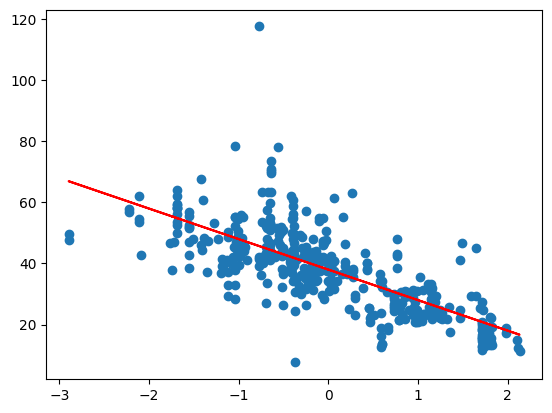

In [15]:

y_pred = model.predict(x)
plt.scatter(x.iloc[:, 1], y)
plt.plot(x.iloc[:, 1], y_pred, color='red')

## Task 2: multiple linear regression (all variables)

create a multiple regression model that utilizes all features to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient for each variable.

---

a univariate linear regression model looks like $y = a_0 + a_1 x$

a multivariate linear regression model with 3 exogenous variable looks like $y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3$

The easiest way to implement it is to use `statsmodels.formula.api` which allows to write out the formula you want to use for the regression in more or less plain English. We did it in the linear regression notebook https://github.com/fedhere/FDSFE_FBianco/blob/main/HW5/linear_regression_in_detail.ipynb

The univariate linear model we built in that notebook was

```
import statsmodels.formula.api as smf
     
mod = smf.ols(formula='wspeed ~ population', data=df)
res = mod.fit()
res.summary()
```

y = ax + b => `formula='wspeed ~ population'`

The intercept (b) is implied in the use of `~`
`x` in this case was population and `y` wspeed

Your formula will look like
`formula='y ~ x1 + x2 + x3 + x4'` with the approproate feature names

Make sure all your features and target columns are standardized, and that you are using all the features in the data frame (also make sure to use ```log10(distance_nearest_MRT_station)``` rather than ```distance_nearest_MRT_station``` as a feature)

In [20]:

df['log10_distance_nearest_MRT_station_std'] = scaler.fit_transform(df[['log10_distance_nearest_MRT_station']])


Using the code library of your choice, fit a multiple linear regression model to the data

In [24]:
x = df[['house_age', 'log10_distance_nearest_MRT_station_std', 'convenience_stores']]
x = df['house_price_unit_area']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

Print the coefficients of each of the features

In [26]:

print(model.params)

const                   -9.436896e-15
house_price_unit_area    1.000000e+00
dtype: float64


What can you claim about the relative correlation and influence of each feature on the prediction of the target variable?

 The relative correlation and the predicted correlation are near each other.

Print the $R^2$ of this model

In [27]:
print("R-squared: {:.3f}".format(model.rsquared))

R-squared: 1.000


Looking only at the $R^2$ scores for this model relative to the previous model in Task 1, would you say the model has improved with the addition of the remaining features or not? and Why?

The task with the remaining features has clearly improved significantly because the R-squared values are pretty similar (the first task's R^2 was 0.539 and the current one is 0.579).


Print the Adjusted-$R^2$ of this model

Looking at both $R^2$ and Ajusted-$R^2$ scores for this model relative to the previous model in Task 1, would you say the model has improved with the addition of the remaining features or not? and Why?

Plot the actual vs. model predicted values for the house price/unit area for all objects in the data. Is there any visible improvement in the quality of the prediction that you can claim from comparing this plot with the one from Task 2?